In [1]:
%matplotlib inline

import sys
sys.path.append("/home/caner/code/hawkes_bound")

import numpy as np
# from fasthawkes.em import hawkes_em, hawkes_perplexity
from fasthawkes.model.mv_exp import MultivariateExpHawkesProcess
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
!head -n15 example_data.csv

21,30
21,45
15,56
13,56
21,57
9,59
13,67
15,67
9,70
13,79
21,82
10,87
13,91
21,95
9,95


In [3]:
df = pd.read_csv("example_data.csv", header=None)
dfs = df.iloc[np.array(df[0]) <= 3, :]
c, t = map(np.array, (dfs.iloc[:,0], dfs.iloc[:,1]))

In [4]:
proc = MultivariateExpHawkesProcess()
res = proc.fit(t.astype(np.float64), c)

(24,)
[  4.19004883e-04   4.08537383e-04   2.91972114e-04   2.94411144e-04
   2.81637372e-01   1.55258356e-01   3.60604681e-01   1.00707842e-01
   2.55207913e-01   8.55744815e-02   3.83140899e-02   5.99840462e-02
   1.52203400e-02   2.30568484e-01   7.92082021e-02   1.51596960e-02
   3.86112936e-02   9.28894513e-03   2.72408561e-01   6.80127427e-02
   2.74616266e-03   4.74028661e-02   6.07504756e-02   2.84655956e-01]


In [5]:
A, b, l = proc.get_params()

In [6]:
t_0 = t[c == 0]
len(t_0) / float(t_0[-1])

0.0005028058591333836

In [9]:
res

      fun: 114789.63435229361
 hess_inv: <24x24 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.87010290e+05,   1.02473331e+06,   1.06499041e+06,
         2.14433893e+06,   1.72235013e+03,   1.48941763e+03,
         1.26314990e+03,   1.26418308e+03,   2.87720468e+03,
         2.41592352e+03,  -6.00644853e+02,   1.46217644e+02,
         1.61094067e+03,   2.46049603e+03,   1.27150270e+03,
         3.03756678e+02,   1.23734935e+02,   1.75733294e+03,
         1.84924284e+03,   1.17062882e+03,   3.16496880e+03,
        -4.62139724e+02,   1.31990237e+03,   1.45373633e+03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 125
      nit: 2
   status: 0
  success: True
        x: array([  4.18999755e-04,   4.08532383e-04,   2.91968542e-04,
         2.94407541e-04,   2.81633926e-01,   1.55256456e-01,
         3.60600268e-01,   1.00706609e-01,   2.55204790e-01,
         8.55734343e-02,   8.36198966e-02,   6.07518778e-02,
         2.29613366e-02,   2.30565662e-

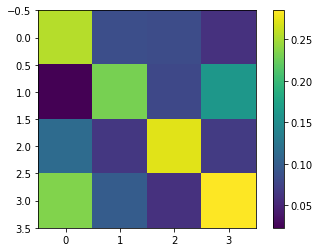

In [8]:
plt.imshow(A)
plt.colorbar()